In [1]:
import resnet, data, numpy as np, matplotlib.pyplot as plt

def show_batch(ds):
    #ds = ds.unbatch()
    
    plt.figure(figsize=(12,10))
    for i, (image, label) in enumerate(ds.take(10)):
        ax = plt.subplot(4,5,i+1)
        plt.imshow(image.numpy().astype(np.uint8))         
        plt.title(label.numpy())
        plt.axis('off')
        
_, _, ds, _ = data.Imagenet2012.load_data(sample_fraction=0.001, only_one=True)
ds = ds.map(lambda r: (r['image'], r['label'])).repeat()

Loading input dataset
A fraction of 0.001 was selected from the total data
Number of examples in the Train dataset is 1 and in the Validation dataset is 1


#### Original image:

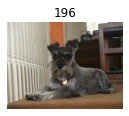

In [2]:
show_batch(ds.take(1))

#### The image after train augmentation
We want to see that the augmentation components work (or don't create exagerated results): 
- resizing and keeping the image ratio & crops with random offsets;
- image flipping;
- brightness and contrast

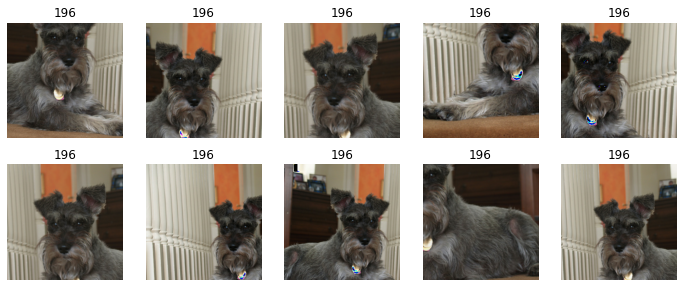

In [3]:
ds_train_augmented = ds.map(resnet.Preprocessing._augment_train)
show_batch(ds_train_augmented)

#### The 10 image crops prepared for testing

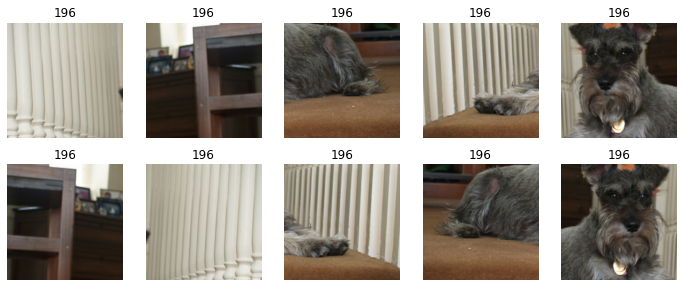

In [5]:
ds_test_augmented = ds.map(resnet.Preprocessing._prepare_testing_10crops).unbatch()
show_batch(ds_test_augmented)